<a href="https://colab.research.google.com/github/gabrielavillagran/Python/blob/main/Explora%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(sns.__version__) # Acima de 0.7.0 existe o pacote catplot

0.11.2


#Importando dados

In [9]:
filmes = pd.read_csv('movies.csv')
notas = pd.read_csv('ratings.csv')

# Descrição das notas

In [10]:
filmes.shape
notas.describe().round(2)

,userId,movieId,rating,timestamp
count,85271.00,85271.00,85270.00,8.527000e+04
mean,277.87,19258.87,3.52,1.196058e+09
std,155.88,35277.24,1.04,2.121931e+08
min,1.00,1.00,0.50,8.281246e+08
25%,140.00,1196.00,3.00,1.014924e+09
50%,288.00,2987.00,3.50,1.179164e+09
75%,414.00,7892.50,4.00,1.421374e+09
max,554.00,193609.00,5.00,1.537799e+09


#Olhando quais filmes existem 

In [11]:
filmes.head()
filmes.columns=['filmeId', 'titulo', 'genero']
filmes.head()


,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
notas.head()
notas.columns= ['Id', 'filmeId','notas', 'momento']
notas.query('filmeId==1').notas.mean()


3.9335106382978724

#Analisando notas dos filmes

In [13]:
notas.query('filmeId==1').notas.mean()

3.9335106382978724

In [14]:
notas.query('filmeId==2').notas.mean()

3.398936170212766

#Agrupando os filmes e obtendo a média

In [15]:
medias_por_filme = notas.groupby('filmeId').mean()['notas']
medias_por_filme.head()


filmeId
1    3.933511
2    3.398936
3    3.282609
4    2.500000
5    3.111111
Name: notas, dtype: float64

#Histograma

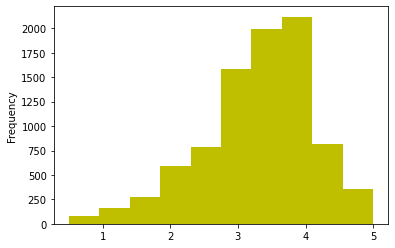

In [16]:
medias_por_filme.plot(kind = 'hist', color ='y') 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


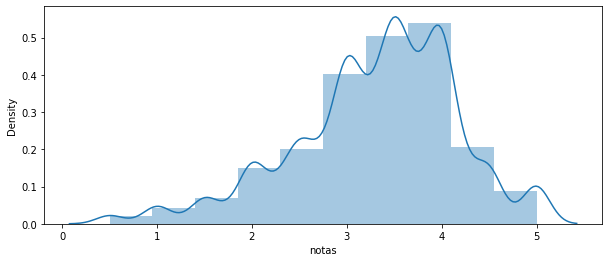

In [17]:
ax = sns.distplot(medias_por_filme, bins=10)
ax.figure.set_size_inches(10,4)

Text(0.5, 1.0, 'Histograma das notas dos filmes')

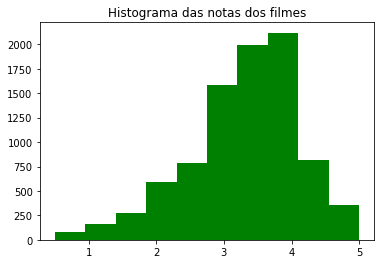

In [18]:
plt.hist(medias_por_filme, color='g')
plt.title('Histograma das notas dos filmes')

#mais baixo nível sem precisar bibloteca extra

#Box plot

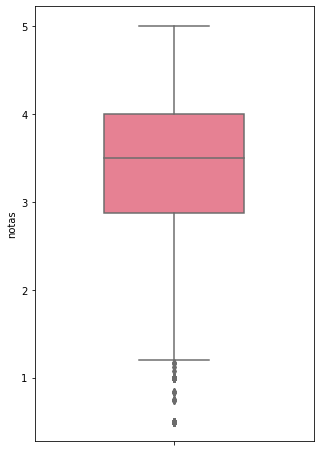

In [19]:
sns.set_palette('husl')
plt.figure(figsize=(5,8))
ax = sns.boxplot(y=medias_por_filme, width=0.5)

# Filmes

In [20]:
medias_por_filme.describe()

count    8757.000000
mean        3.308397
std         0.867765
min         0.500000
25%         2.875000
50%         3.500000
75%         4.000000
max         5.000000
Name: notas, dtype: float64

In [21]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [22]:
tmdb.shape[0]

4803

In [23]:
# unique - saber quantos original_language diferentes existem
# Variável categorica nominal, porem não possui um "ranking", qual lingua vem antes ou depois, não e ordinal.

tmdb.original_language.unique()
# ou tmdb['original_language'].unique()



# Exemplo de categórica ordinal , 1 grau + 2 grau != 3 grau, não é possíel as operações
# primeiro grau, segundo grau, terceiro grau
# 1 grau < 2 grau < 3 grau

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [24]:
# budget => orcamento => quantitativo contínuo (valores reais)
# Votos => 1, 2, 3, 4, nao tem 2.5 votos. categórico intervalar
# notas do movielens => 0.5, 1, 1.5...5, não tem 2.7 é categórico intervalar

In [25]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [26]:
# contar quantos filmes tem de acordo com sua lingua original
# value_counts() conta ate mesmo str, ele conta o número de aparições

tmdb['original_language'].value_counts()


en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [27]:
# para transformar em um DataFrame

"""contagem_de_lingua = tmdb['original_language'].value_counts()
contagem_de_lingua = pd.DataFrame(categoria_idioma)
contagem_de_lingua"""

# ou 
# temos um indice e uma coluna poque é uma Series, se queremos transformar o indice em uma coluna 
#temos que resetar o index

contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [28]:
# Renomeando as colunas
contagem_de_lingua.columns = ["Original_language","Total"]
contagem_de_lingua.head()

,Original_language,Total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


## Gráfico de barras

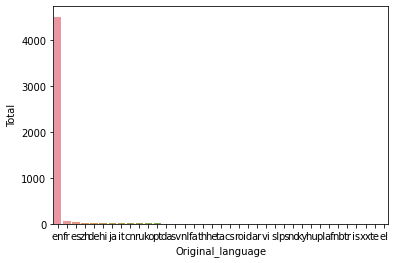

In [29]:
# Para visualizar as categorias 
# Vamos plotar as categorias

# Para o grafico de barras e necessario colocar o eixo x e eixo y e os dados "data"
sns.barplot(x = 'Original_language', y='Total', data = contagem_de_lingua)

# Tipo de plot mais baixo nivel onde conseguimos ter um controle melhor do plot

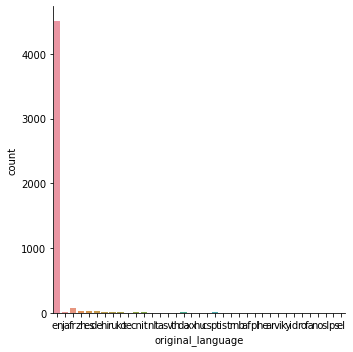

In [30]:
# Tipo de plot mais alto nível, usaremos o catplot para o grafico de barras
# O kind escolhido foi o 'count' para contar a categoria escolhida
# De maneira rápida dizemos para pegar o DataFrame, agrupar por lingua original e contar quantas vezes aparece

sns.catplot(x = 'original_language', kind = 'count', data = tmdb)

# Este tipo de grafico não se mostrou adequeado para este tipo de dado

## Grafico de pizza


([<matplotlib.patches.Wedge at 0x7f91b9277950>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

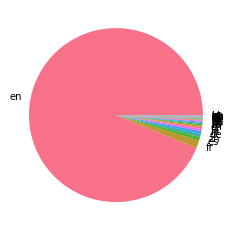

In [31]:
# Vamos utilizar o matplotlib para fazer o grafico de pizza
plt.pie(contagem_de_lingua['Total'], labels = contagem_de_lingua['Original_language'])
# labels =  o nome da categoria
# dificilmente vamos usar

## Agrupando os outros idiomas e comparando com o ingles

In [32]:
total_por_lingua = tmdb['original_language'].value_counts()

total_geral = total_por_lingua.sum()

# localizar qual as linhas que contem o indice 'en'

total_de_ingles= total_por_lingua.loc['en']

total_do_resto = total_geral - total_de_ingles

print(total_de_ingles, total_do_resto)

# Fizemos a categoria ingles e "outros" pois a presença do "en" era muito maior que os demais para vermos separados

4505 298


In [33]:
dados = {
    'lingua' :['ingles','outros'],
    'total'  :[total_de_ingles, total_do_resto] 
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [34]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


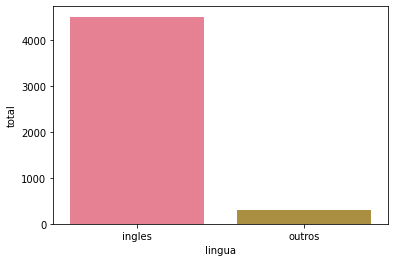

In [35]:
# O gráfico de barras ficou melhor apresentado agrupando os outros idiomas que possuiam o valor menos significativo
sns.barplot(x='lingua', y ='total', data = dados)

## Gráfico de pizza para ingles os outros idiomas 

([<matplotlib.patches.Wedge at 0x7f91b9145710>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

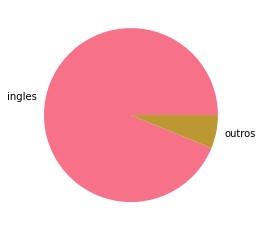

In [36]:
# Utilizaremos o DataFrame "dados" que possui a contagem de  ingles e outros e o numero total de cada

plt.pie(dados['total'], labels = dados['lingua'])

# Entre gráfico de barras e pizza, melhor é o grafico de barras

## Analisando os outros idiomas apenas

In [37]:
# Para buscar os "outros" usamos a query
# tmdb.query("original_language == 'en'")
# ele trará apenas as linhas que tenham a lingua original ingles

# Como queremos as linguas diferentes de 'en' buscaremos assim :

total_por_lingua_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

total_por_lingua_outros_filmes


fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [38]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

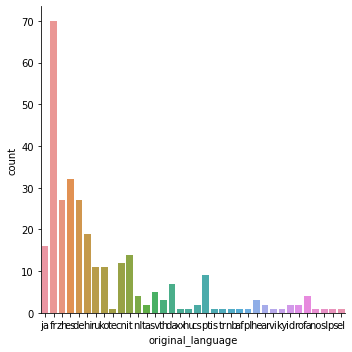

In [39]:
# Tipo de plot mais alto nível, usaremos o catplot para o grafico de barras
# O kind escolhido foi o 'count' para contar a categoria escolhida
# De maneira rápida dizemos para pegar o DataFrame, agrupar por lingua original e contar quantas vezes aparece

sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles )


## Melhorando a visualizacao do gráfico em barra dos outros idiomas (consultar a documentacao)

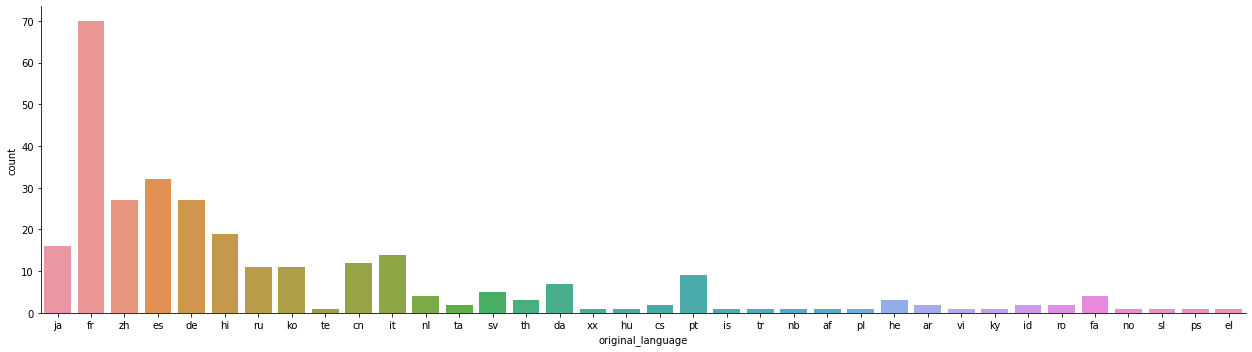

In [40]:
# Na documentacao temos aspect = 1. Vamos adicionar isso no nosso grafico
sns.catplot(x = 'original_language',
            kind = 'count', 
            data = filmes_sem_lingua_original_em_ingles, aspect = 3.5)

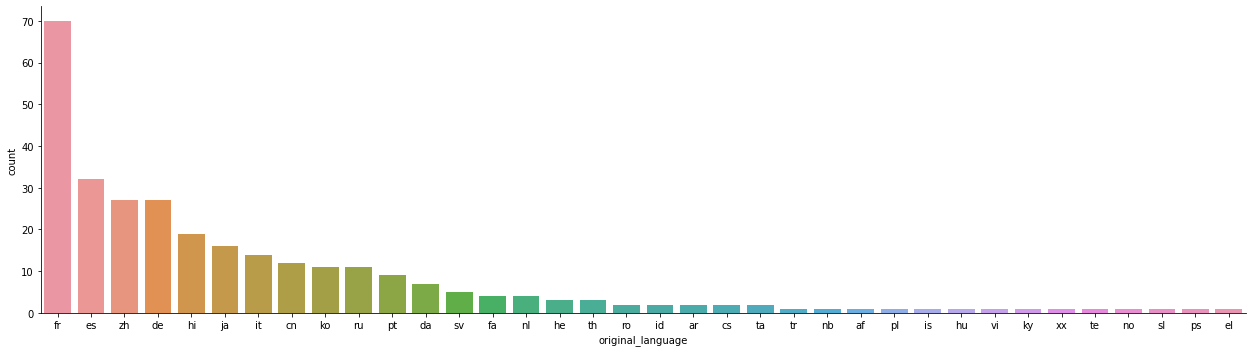

In [41]:
# Vamos categorizar por ordem crescente 
# adicionar 'orden' no nosso grafico

sns.catplot(x = 'original_language',
            kind = 'count', 
            data = filmes_sem_lingua_original_em_ingles, 
            aspect = 3.5, order=total_por_lingua_outros_filmes.index)

# order=total_por_lingua_outros_filmes.index pois temos uma Series e o index é o nome dos idiomas "fr, es" etc

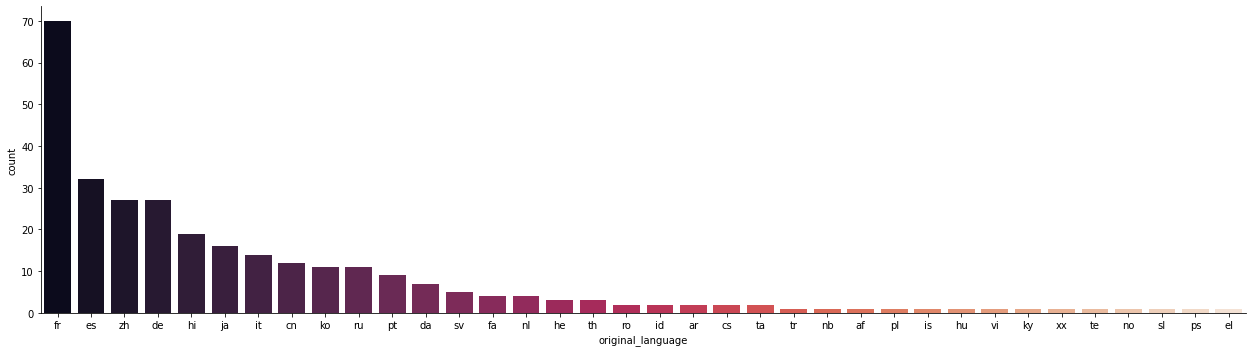

In [42]:
# Mudando a palleta de cores, usaremos a str dentro da palette pois não queremos plotar a palette

sns.catplot(x = 'original_language',
            kind = 'count', 
            data = filmes_sem_lingua_original_em_ingles, 
            aspect = 3.5, order=total_por_lingua_outros_filmes.index,
            palette ="rocket")

#Revisando o papel da média, mediana, medidaas de tendencia central, dispersão, desvio padrão, box-plot e histogramas

## Visualização de dois filmes em especifico 

In [43]:
# Queremos os filmes Toy Story (1995) e Jumanji (1995)	
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [44]:
notas.head()

,Id,filmeId,notas,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [45]:
# Queremos apenas as notas desses dois filmes

#filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

notas_do_toy_story = notas.query( 'filmeId == 1')

notas_do_jumanji = notas.query( 'filmeId == 2')

print( len(notas_do_toy_story), len(notas_do_jumanji))

188 94


## A média dos dois filmes

In [46]:
print( 'Nota média do Toy Story %.2f' % notas_do_toy_story['notas'].mean())

Nota média do Toy Story 3.93


In [47]:
#apresentar o valor na tela como um texto, pode utilizar o '%.2f' 
#que é uma mudança de formatação de texto e não de valor da variável.

print( 'Nota média do Jumanji %.2f' % notas_do_jumanji['notas'].mean())

Nota média do Jumanji 3.40


In [48]:
print( 'Nota média do Toy Story %.2f' % notas_do_toy_story['notas'].mean())

Nota média do Toy Story 3.93


## A mediana dos dois filmes

In [49]:
print( 'Nota média do Jumanji %.2f' % notas_do_jumanji['notas'].median())

Nota média do Jumanji 3.50


In [50]:
print( 'Nota média do Toy Story %.2f' % notas_do_toy_story['notas'].median())

Nota média do Toy Story 4.00


    Os resultados são basicamente os mesmos, afinal não sabemos, 
    nessa divisão, a proporção de cada uma das notas para os dois filmes.
    Por mais que tentemos analisar o "comportamento central" desses conjuntos,
    estamos tentando resumir toda a distribuição dos dados em um único número, 
    perdendo um volume muito grande de informação.


In [51]:
import numpy as np
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [52]:
filme1

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [53]:
filme2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
print(filme1.mean(), filme2.mean())

3.0 3.0


In [55]:
print(np.median(filme1), np.median(filme2))

3.0 3.0


In [83]:
# desvio padrão
filme1.std()


0.5

In [84]:
# desvio padrão muito maior
filme2.std()

2.0

## histograma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


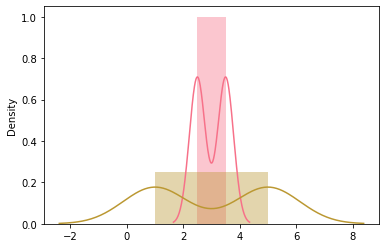

In [56]:
# o distplot não é adequeado para esse padrão 
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

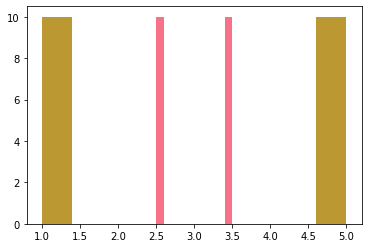

In [57]:
plt.hist(filme1)
plt.hist(filme2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


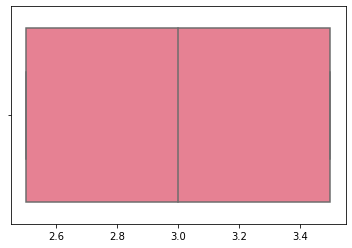

In [58]:
sns.boxplot(filme1)

{'boxes': [<matplotlib.lines.Line2D at 0x7f91bbdd5c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91b9151090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f91b90ebad0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f91be920990>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f91be3cdf10>,
  <matplotlib.lines.Line2D at 0x7f91be3e2c50>]}

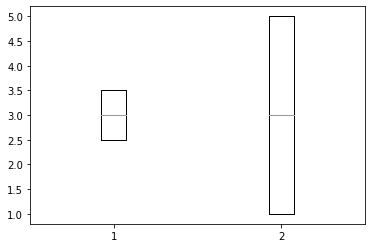

In [59]:
plt.boxplot([filme1, filme2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


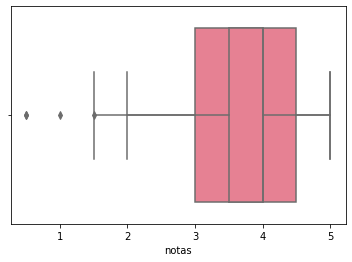

In [60]:
sns.boxplot(notas_do_toy_story['notas'])
sns.boxplot(notas_do_jumanji['notas'])

# o bloxplot o seaborn deixa um dentro do outro, tentaremos com o matplotlib

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f91b8a8f7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91b89f3090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f91b89f90d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f91b89f3b50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f91b89eb5d0>,
  <matplotlib.lines.Line2D at 0x7f91b8a030d0>]}

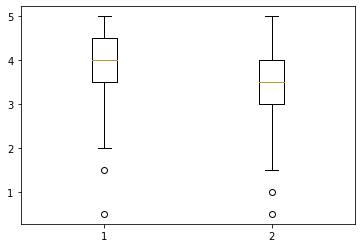

In [61]:
plt.boxplot([notas_do_toy_story['notas'], notas_do_jumanji['notas']])

#  Ficou bem melhor

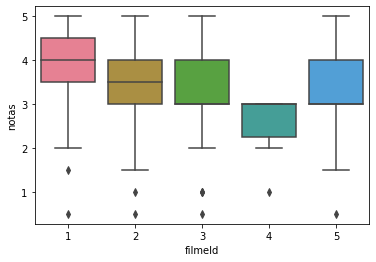

In [70]:
sns.boxplot(x = "filmeId", y = "notas", data = notas.query("filmeId in (1,2,3,4,5)"))

## Desvio Padrão

In [78]:
notas_do_jumanji.notas.std()


0.8907523316343643

In [79]:
notas_do_toy_story.notas.std()

0.8415000706299315